In [2]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [3]:
#ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset=pd.read_csv('/home/hacker_bunny/Files/Project_2/dataset/Unicorn_Companies.csv')
dataset.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0


In [5]:
dataset.isna().sum()

Company                0
Valuation ($B)         0
Date Joined            0
Country                0
City                   0
Industry               0
Select Inverstors     17
Founded Year          43
Total Raised          24
Financial Stage      988
Investors Count        1
Deal Terms            29
Portfolio Exits      988
dtype: int64

In [6]:
def country_vs_company_vis(data,type):
    fig = px.pie(data, 
             names='Country', 
             values=type, 
             hover_data=[type],
             title=type, 
             labels={'Country': 'Country Name'},   
             color_discrete_sequence=px.colors.qualitative.Dark24,
             hole=0.3
             )

    # Update layout
    fig.update_layout(
        title_font_size=20,  # Title font size
        title_font_family='Arial',  # Title font family
        title_x=0.5,  # Title position
        showlegend=True,  # Show legend
        legend_title='Countries',  # Legend title
        legend_font_size=12,  # Legend font size
        legend_tracegroupgap=10,  # Gap between legend items
        width=800,  # Overall width
        height=500,  # Overall height
        )
    fig.show()

In [7]:
def company_vs_valuation_vis(data,type,Range,size):
    plt.figure(figsize=size)
    sns.set_theme(context='paper',style='whitegrid',palette='Spectral')
    sns.set_color_codes('deep')
    sns.barplot(data,
                x='Company',y='Valuation',
                hue='Country',
                )
    plt.xticks(rotation=90)
    plt.yticks(Range)
    plt.xlabel('Company', fontsize=14)
    plt.ylabel('Valuation in Billion $', fontsize=14)
    plt.title(f'Distribution of {type} Valuation', fontsize=16)
    plt.tight_layout()
    plt.show()

In [8]:

cleaned_dataset=dataset.drop(columns=['Date Joined','Select Inverstors','Deal Terms','City']).rename(columns={'Valuation ($B)':'Valuation'}).fillna('Unknown')
cleaned_dataset['Valuation']=cleaned_dataset['Valuation'].str.replace("$","").astype(float)
cleaned_dataset

,Company,Valuation,Country,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
0,Bytedance,140.0,China,Artificial intelligence,2012.0,$7.44B,IPO,28.0,5.0
1,SpaceX,100.3,United States,Other,2002.0,$6.874B,Unknown,29.0,Unknown
2,Stripe,95.0,United States,Fintech,2010.0,$2.901B,Asset,39.0,1.0
3,Klarna,45.6,Sweden,Fintech,2005.0,$3.472B,Acquired,56.0,1.0
4,Epic Games,42.0,United States,Other,1991.0,$4.377B,Acquired,25.0,2.0
...,...,...,...,...,...,...,...,...,...
1032,Timescale,1.0,United States,Internet software & services,2015.0,$181.06M,Unknown,7.0,Unknown
1033,Scalapay,1.0,Italy,Fintech,2019.0,$700M,Unknown,10.0,Unknown
1034,Omada Health,1.0,United States,Health,2011.0,$449.72M,Unknown,30.0,Unknown
1035,BlueVoyant,1.0,United States,Cybersecurity,2017.0,$525.5M,Unknown,6.0,Unknown


# Now let us see which country has the most unicorn companies

In [9]:
country_count=cleaned_dataset['Country'].value_counts().reset_index().rename(columns={'count':'Number of Unicorn Companies'})
others=country_count[country_count['Number of Unicorn Companies']<7]['Number of Unicorn Companies'].sum()
new_row={'Country':'Others','Number of Unicorn Companies':int(others)}
country_count=country_count[country_count['Number of Unicorn Companies']>=7]
country_count.loc[len(country_count)]=new_row
country_count

,Country,Number of Unicorn Companies
0,United States,536
1,China,168
2,India,63
3,United Kingdom,42
4,France,24
5,Germany,24
6,Israel,20
7,Canada,19
8,Brazil,16
9,South Korea,12


In [10]:
country_vs_company_vis(country_count,'Number of Unicorn Companies')


In [11]:
cleaned_dataset['Industry'].unique()#Ai,Fintech,Cybersecurity,Data management and analytics

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank',
       'E-commerce & direct-to-consumer', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Partners, DST Global',
       'SingTel Inn

In [12]:
working_industries=['Artificial intelligence''Artificial Intelligence','Cybersecurity','Fintech']
filtered_dataset=cleaned_dataset[dataset['Industry'].isin(working_industries)]
filtered_dataset

,Company,Valuation,Country,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
2,Stripe,95.0,United States,Fintech,2010.0,$2.901B,Asset,39.0,1.0
3,Klarna,45.6,Sweden,Fintech,2005.0,$3.472B,Acquired,56.0,1.0
6,Checkout.com,40.0,United Kingdom,Fintech,2012.0,$1.83B,Unknown,15.0,Unknown
9,Revolut,33.0,United Kingdom,Fintech,2015.0,$1.716B,Unknown,31.0,Unknown
12,Chime,25.0,United States,Fintech,2013.0,$2.599B,Divestiture,24.0,1.0
...,...,...,...,...,...,...,...,...,...
1023,Esusu,1.0,United States,Fintech,2015.0,$144.43M,Unknown,25.0,Unknown
1027,Payhawk,1.0,United Kingdom,Fintech,2018.0,$236.5M,Unknown,15.0,Unknown
1030,CHEQ,1.0,United States,Cybersecurity,2014.0,$171M,Unknown,6.0,Unknown
1033,Scalapay,1.0,Italy,Fintech,2019.0,$700M,Unknown,10.0,Unknown


# Lets analyse fintech unicorn companies

In [28]:
dataset_Fintech_subset=cleaned_dataset[dataset['Industry'].isin(['Fintech'])].drop(columns=['Industry'])
dataset_Fintech_subset

,Company,Valuation,Country,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
2,Stripe,95.0,United States,2010.0,$2.901B,Asset,39.0,1.0
3,Klarna,45.6,Sweden,2005.0,$3.472B,Acquired,56.0,1.0
6,Checkout.com,40.0,United Kingdom,2012.0,$1.83B,Unknown,15.0,Unknown
9,Revolut,33.0,United Kingdom,2015.0,$1.716B,Unknown,31.0,Unknown
12,Chime,25.0,United States,2013.0,$2.599B,Divestiture,24.0,1.0
...,...,...,...,...,...,...,...,...
1004,Lydia,1.0,France,2011.0,$260.33M,Unknown,12.0,Unknown
1017,CAIS,1.0,United States,2009.0,$283M,Unknown,7.0,Unknown
1023,Esusu,1.0,United States,2015.0,$144.43M,Unknown,25.0,Unknown
1027,Payhawk,1.0,United Kingdom,2018.0,$236.5M,Unknown,15.0,Unknown


In [14]:
dataset_Fintech_subset['Country'].unique()

array(['United States', 'Sweden', 'United Kingdom', 'Germany', 'Canada',
       'India', 'South Korea', 'Netherlands', 'Brazil', 'Australia',
       'France', 'Denmark', 'Austria', 'Indonesia', 'Argentina', 'China',
       'Vietnam', 'Mexico', 'Israel', 'Nigeria', 'Philippines', 'Senegal',
       'Japan', 'Ireland', 'Thailand', 'Belgium', 'Switzerland', 'Italy'],
      dtype=object)

In [15]:
def other_row(data,company,no):
    data_country=data['Country'].value_counts().reset_index().rename(columns={'count':f'Number of {company} Unicorn Companies'})
    others=data_country[data_country[f'Number of {company} Unicorn Companies']<no][f'Number of {company} Unicorn Companies'].sum()
    new_row={'Country':'Others',f'Number of {company} Unicorn Companies':int(others)}
    data_country=data_country[data_country[f'Number of {company} Unicorn Companies']>=no]
    data_country.loc[len(data_country)]=new_row
    return data_country


## Country Distribution of Fintech Unicorn Companies
 Let's determine which country hosts the most fintech unicorn companies. This analysis will reveal the leading regions for high-value fintech startups.

In [16]:
fintech_country=other_row(dataset_Fintech_subset,'Fintech',2)
fintech_country

,Country,Number of Fintech Unicorn Companies
0,United States,108
1,United Kingdom,25
2,India,14
3,China,8
4,Brazil,5
5,France,5
6,Germany,5
7,Canada,4
8,Mexico,4
9,Netherlands,3


In [17]:
country_vs_company_vis(fintech_country,'Number of Fintech Unicorn Companies')

## Now let us analyse the companies

### Most valued Fintech company


In [18]:
data_sorted=dataset_Fintech_subset.sort_values(by='Valuation',ascending=False).reset_index(drop=True)
fintech_valuation=data_sorted[data_sorted['Valuation']>3]
fintech_valuation=fintech_valuation.iloc[:,0:3]
fintech_valuation

,Company,Valuation,Country
0,Stripe,95.00,United States
1,Klarna,45.60,Sweden
2,Checkout.com,40.00,United Kingdom
3,Revolut,33.00,United Kingdom
4,Chime,25.00,United States
5,Ripple,15.00,United States
6,Plaid,13.40,United States
7,Brex,12.30,United States
8,Bolt,11.00,United States
9,Alchemy,10.20,United States


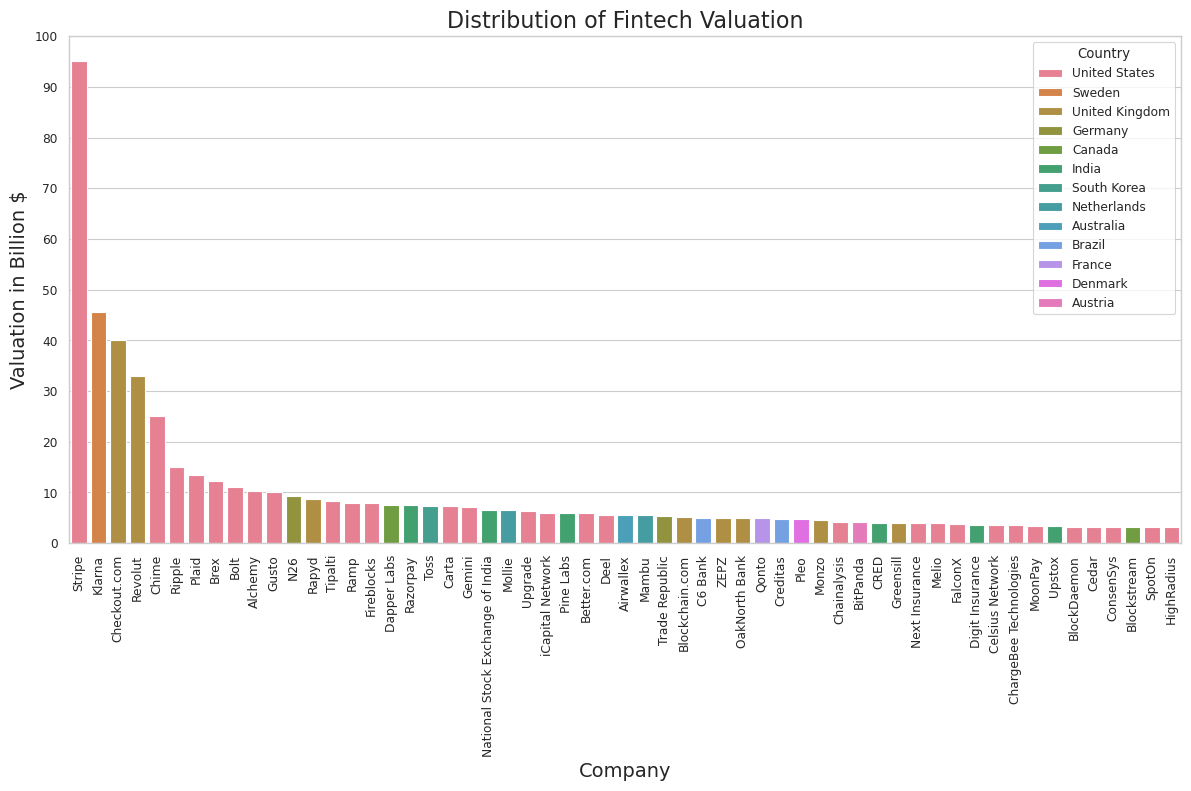

In [19]:
company_vs_valuation_vis(fintech_valuation,'Fintech',Range=range(0,101,10),size=(12,8))

In [20]:
dataset_Fintech_subset.loc[(dataset_Fintech_subset['Company'] == 'Stripe') | (dataset_Fintech_subset['Company'] == 'Klarna') | (dataset_Fintech_subset['Company'] == 'Checkout.com')]

,Company,Valuation,Country,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
2,Stripe,95.0,United States,2010.0,$2.901B,Asset,39.0,1.0
3,Klarna,45.6,Sweden,2005.0,$3.472B,Acquired,56.0,1.0
6,Checkout.com,40.0,United Kingdom,2012.0,$1.83B,Unknown,15.0,Unknown


## Least valued Fintech Company 

In [21]:
data_sorted=dataset_Fintech_subset.sort_values(by='Valuation',ascending=True).reset_index(drop=True)
fintech_valuation_l=data_sorted[data_sorted['Valuation']<1.5]
fintech_valuation_l=fintech_valuation_l.iloc[:,0:3]
fintech_valuation_l

,Company,Valuation,Country
0,Scalapay,1.00,Italy
1,SmartAsset,1.00,United States
2,Vise,1.00,United States
3,Amount,1.00,United States
4,Forte Labs,1.00,United States
...,...,...,...
76,Stash,1.40,United States
77,Scalable Capital,1.40,Germany
78,Symphony,1.40,United States
79,M1 Finance,1.45,United States


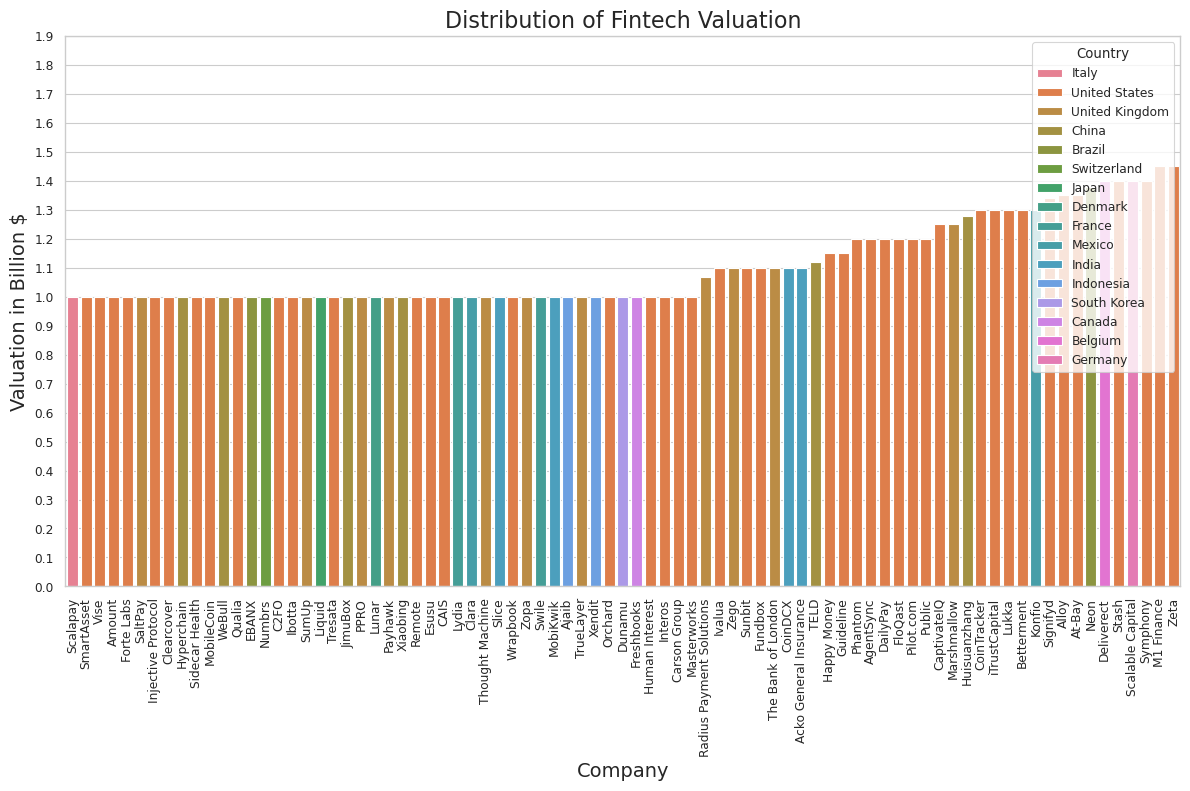

In [22]:
company_vs_valuation_vis(fintech_valuation_l,'Fintech',np.arange(0,2,0.1),(12,8))

### So from the above graph we can see that the lowest valuation is $1 Billion dollars, and there is many unicorns let us analyse all of them

In [23]:
l_valuation=dataset_Fintech_subset.loc[dataset_Fintech_subset['Valuation']==1]
l_valuation

,Company,Valuation,Country,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
793,JimuBox,1.0,China,Unknown,$131M,Unknown,10.0,Unknown
829,Tresata,1.0,United States,2011.0,$51.93M,Unknown,2.0,Unknown
841,Liquid,1.0,Japan,2014.0,$158M,Unknown,8.0,Unknown
848,SumUp,1.0,United Kingdom,2011.0,$1.365B,Acquired,18.0,1.0
849,Ibotta,1.0,United States,2011.0,$95.91M,Unknown,19.0,Unknown
850,C2FO,1.0,United States,2008.0,$539.68M,Unknown,14.0,Unknown
851,Numbrs,1.0,Switzerland,Unknown,$127.6M,Unknown,6.0,Unknown
852,EBANX,1.0,Brazil,2012.0,$460M,Unknown,3.0,Unknown
866,Qualia,1.0,United States,2015.0,$200.18M,Unknown,7.0,Unknown
870,PPRO,1.0,United Kingdom,2006.0,$370M,Unknown,9.0,Unknown


In [24]:
country_l_valuation=l_valuation['Country'].value_counts().reset_index().rename(columns={'count':'Least Valued Fintech Companies'})
country_vs_company_vis(country_l_valuation,'Least Valued Fintech Companies')

In [25]:
l_valuation['Founded Year'].value_counts().reset_index()

,Founded Year,count
0,Unknown,7
1,2018.0,7
2,2016.0,6
3,2015.0,5
4,2011.0,4
5,2014.0,3
6,2012.0,3
7,2020.0,2
8,2005.0,2
9,2009.0,2


In [26]:
l_valuation['Financial Stage'].unique()

array(['Unknown', 'Acquired'], dtype=object)

In [27]:
l_valuation['Investors Count'].value_counts()

Investors Count
10.0    5
9.0     5
12.0    4
8.0     4
15.0    3
14.0    3
7.0     3
17.0    3
18.0    2
6.0     2
3.0     2
30.0    1
31.0    1
1.0     1
26.0    1
5.0     1
22.0    1
19.0    1
20.0    1
2.0     1
25.0    1
Name: count, dtype: int64